In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import path

In [2]:
DATA_DIR = "C:/Users/jake_/Desktop/ltcwbb-files/data"

In [42]:
df = pd.read_csv(path.join(DATA_DIR, '100-game-sample', 'pitches.csv'))
df.head()

Index(['ab_id', 'pitcher', 'batter', 'i', 'b', 's', 'o', 'pitch_type', 'mph',
       'type', 'code', 'x0', 'y0', 'z0', 'px', 'pz', 'spin_rate', 'spin_dir',
       'sz_bot', 'sz_top', 'pitch_num', 'end_speed', 'g_id', 'b_score',
       'pitcher_team', 'on_1b', 'on_2b', 'on_3b', 'b_score_after_pitch'],
      dtype='object')

In [4]:
# let's limit our data to the most common pitches
df = df.query("pitch_type in ('FF', 'SL', 'CH', 'FT', 'CU', 'SI', 'FC', 'FS', 'KC')")

In [5]:
# So only 10% of pitches are faster than 95.3 (aka the 90th percentile)
df['mph'].quantile(.9)

95.3

In [6]:
df.query("pitch_type == 'FF'")['mph'].quantile(.9)

96.4

In [7]:
df[['mph', 'spin_rate']].describe()

,mph,spin_rate
count,29421.000000,29421.000000
mean,88.368903,1659.385539
std,6.034477,665.983585
min,57.900000,4.149000
25%,84.200000,1168.486000
50%,89.700000,1827.416000
75%,93.000000,2180.735000
max,104.300000,4690.924000


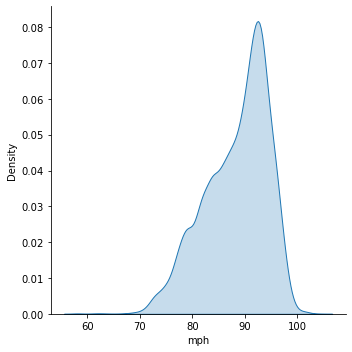

In [8]:
g = sns.displot(df, x='mph', kind='kde', fill=True)

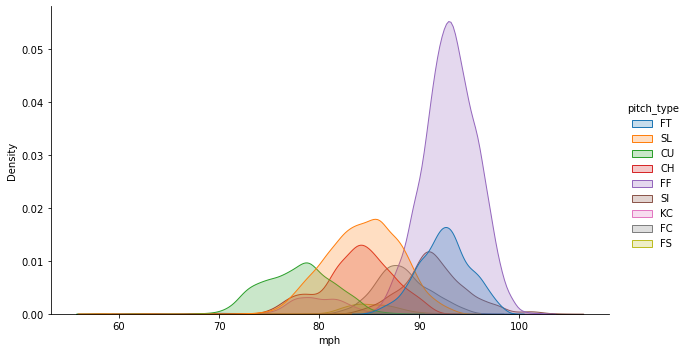

In [9]:
# This plot effectively shows distribution of pitch speeds across different types of pitches.
g = sns.displot(df, x='mph', kind='kde', hue='pitch_type', fill=True, aspect=1.75)

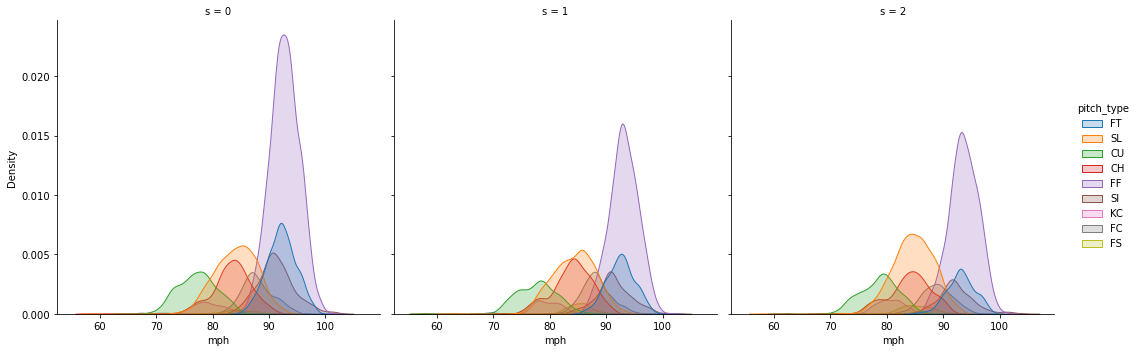

In [10]:
# Distribution of Pitch Speed by Type and N of Strikes
g = sns.displot(df, x='mph', kind='kde', hue='pitch_type', col='s', fill=True)

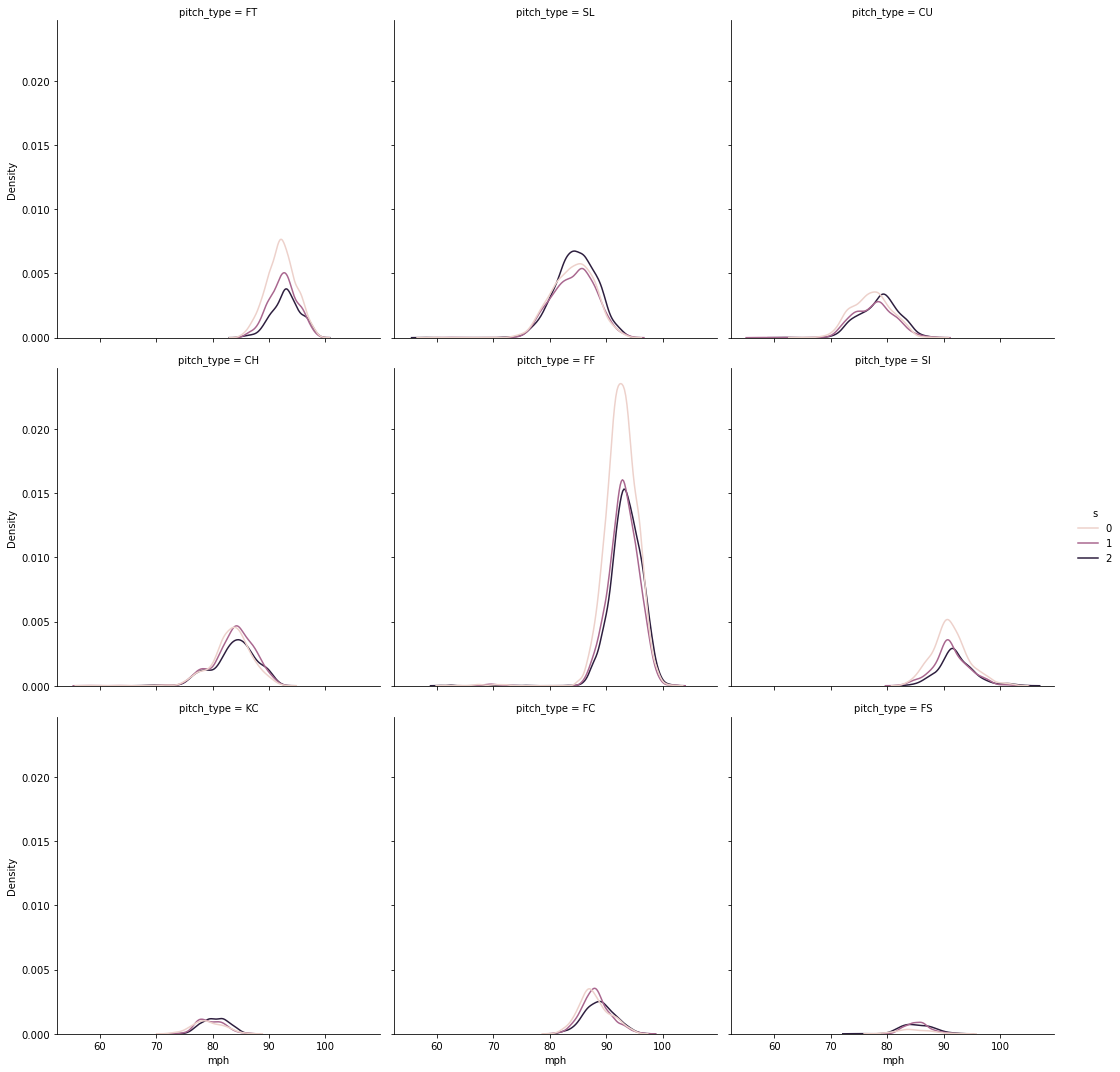

In [11]:
# Are pitchers throwing harder the more strikes there are? NOTE: Fill was turned off b/c it makes it easier to compare
# With col='pitch_type', seaborn makes a separate plot (in its own column) for each val of pitch_type
# This makes it clear that - holding pitch type constant - pitchers are throwing slightly harder the more strikes there are

# swap the hue and col arguments
# note the col_wrap=3 argument is just telling seaborn to start a new row after
# 3 columns
g = sns.displot(df, x='mph', kind='kde', hue='s', col='pitch_type', col_wrap=3)

Using both ```row``` and ```col``` together don't come up that often, but in this case it'd work perfectly for adding in balls to visualize distributions over a full count

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


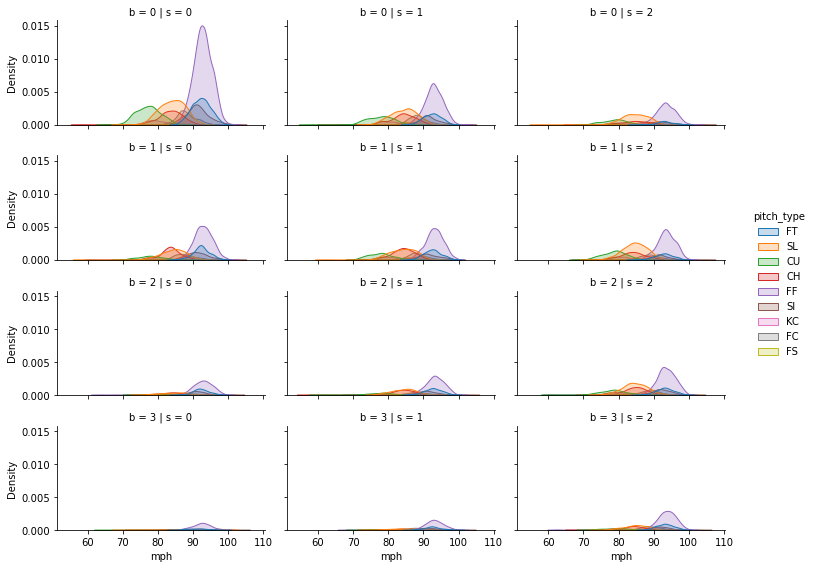

In [12]:
# full count
# note: aspect, height, etc are purely aesthetic, we'll cover them below
g = sns.displot(df, kind='kde', x='mph', col='s', row = 'b', hue='pitch_type', fill=True, aspect=1.75, height=2)

In [13]:
# thinking about seaborn: specify seperate columns for columns, hue (color),
# thing we're plotting (points)
# so we need points in one column, then another type for scoring type

In [14]:
# load data
games = pd.read_csv(path.join(DATA_DIR, '100-game-sample', 'games.csv'))

In [15]:
games[['home_team', 'away_team', 'home_final_score', 'away_final_score']].head()

,home_team,away_team,home_final_score,away_final_score
0,CIN,WAS,5,6
1,NYA,TBA,11,4
2,COL,ATL,3,8
3,PHI,MIA,20,1
4,SLN,ARI,1,4


Lets build a function that - given our data(```game```) and a location(```home``` or ```away```) - moves that score (e.g. ```game```[```'home_final_score'```]) to a score column, then adds in another column indicating which location we're dealing with

In [16]:
def home_away_df(_df, location):
    _df = _df[['date', f'{location}_team', f'{location}_final_score']]
    _df.columns = ['date', 'team', 'final_score']
    _df['location'] = location
    return _df

In [17]:
home_away_df(games, 'home').head()

C:\Users\jake_\AppData\Local\Temp/ipykernel_17556/1339316756.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['location'] = location


,date,team,final_score,location
0,2018-04-01,CIN,5,home
1,2018-04-03,NYA,11,home
2,2018-04-06,COL,3,home
3,2018-04-07,PHI,20,home
4,2018-04-08,SLN,1,home


In [18]:
games_long = pd.concat([home_away_df(games, loc) for loc in ['home', 'away']], ignore_index=True)
games_long

C:\Users\jake_\AppData\Local\Temp/ipykernel_17556/1339316756.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['location'] = location


,date,team,final_score,location
0,2018-04-01,CIN,5,home
1,2018-04-03,NYA,11,home
2,2018-04-06,COL,3,home
3,2018-04-07,PHI,20,home
4,2018-04-08,SLN,1,home
...,...,...,...,...
195,2018-09-28,WAS,2,away
196,2018-09-29,CHA,3,away
197,2018-09-29,CLE,4,away
198,2018-09-30,LAN,15,away


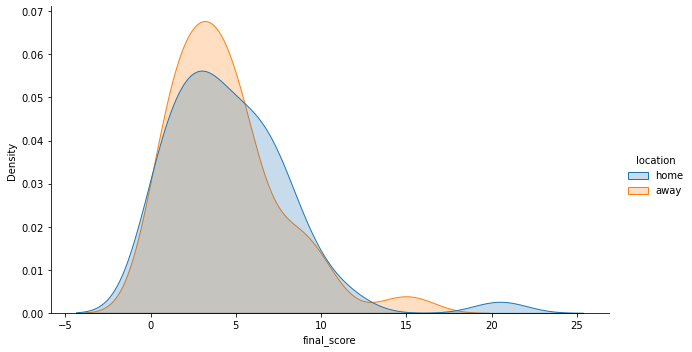

In [19]:
g = sns.displot(games_long, kind='kde', x='final_score', hue='location', fill=True, aspect=1.75)

# Scatter Plots

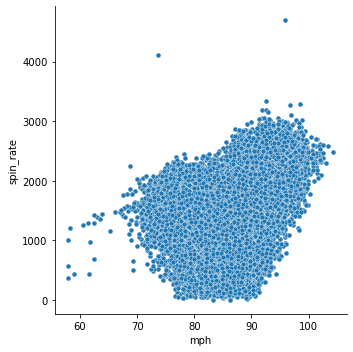

In [20]:
g = sns.relplot(x='mph', y='spin_rate', data=df, s=25)

It looks like this cloud of points is moving up and to the right, suggesting a *positive* relationship between pitch speed and spin.

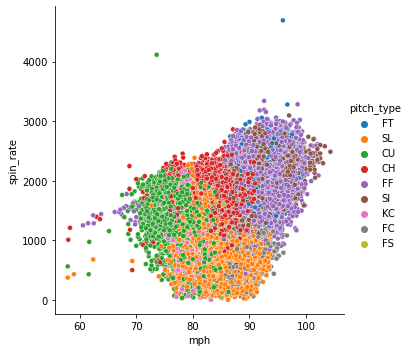

In [21]:
g = sns.relplot(x='mph', y='spin_rate', hue='pitch_type', data=df, s=25)

We can seperate plots on their own plots with the ```col``` argument

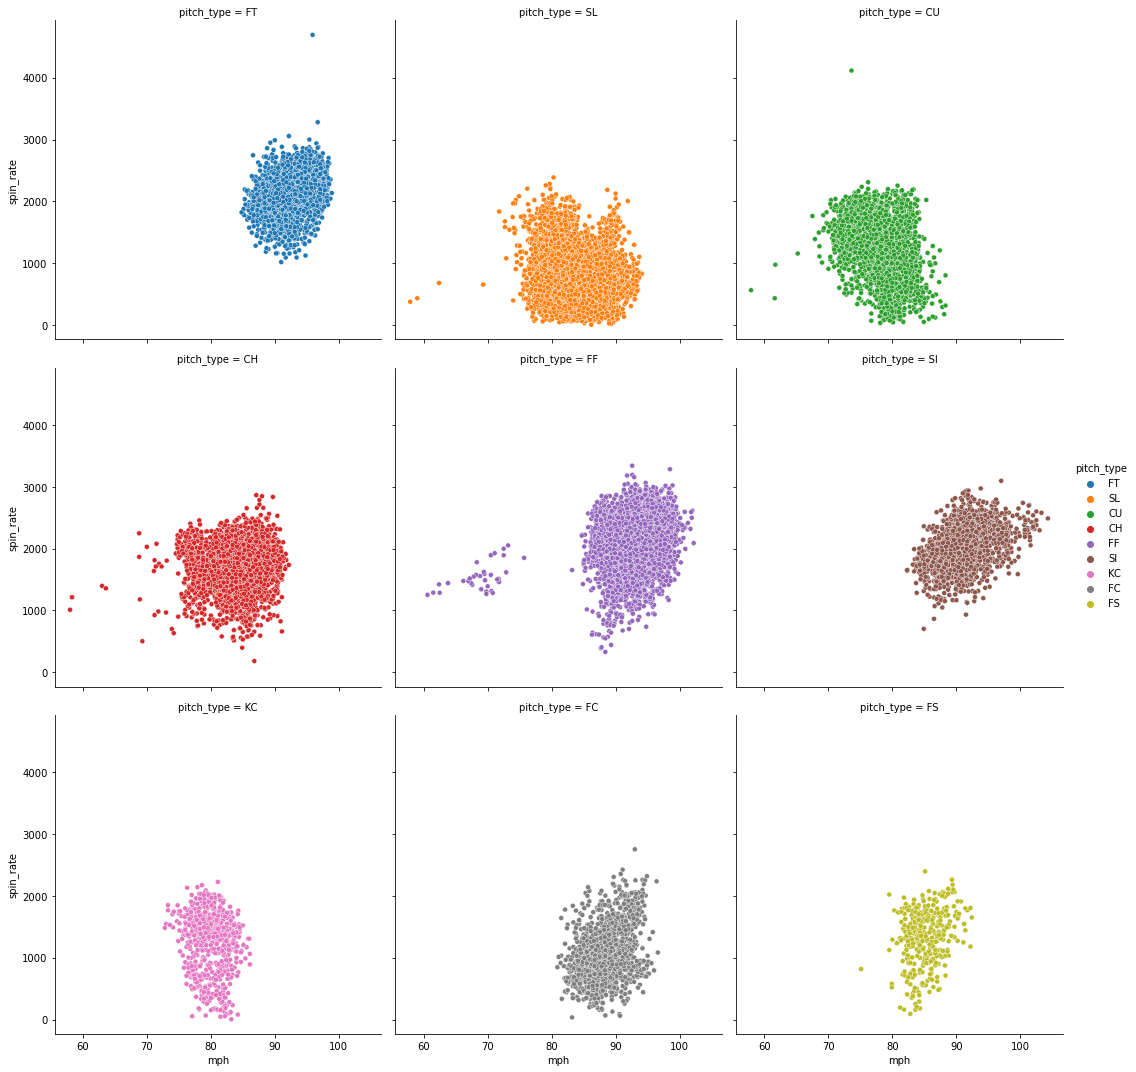

In [22]:
g = sns.relplot(x='mph', y='spin_rate', col='pitch_type', hue = 'pitch_type', data=df, s =25, col_wrap=3)

#### Figure Above: Pitch Speed vs Spin by Pitch Type - Columns
This graph implies the relationship between speed and spin rate is stronger for sinkers (SI), cutters (FC), and splitters(FS). The relationship for these last three looks *positive* (the cloud moves up and to the right, i.e. spin and speed tend to increase together), while changeups (CU) spin goes *down* as speed increases.

## Issues with Scatter Plots
A scatter plot is the classic example for visualizing relationships between data. However, bc you're plotting *every* point on a graph, it can be hard to difficult to determine what's going on when there are a lot of overlapping points

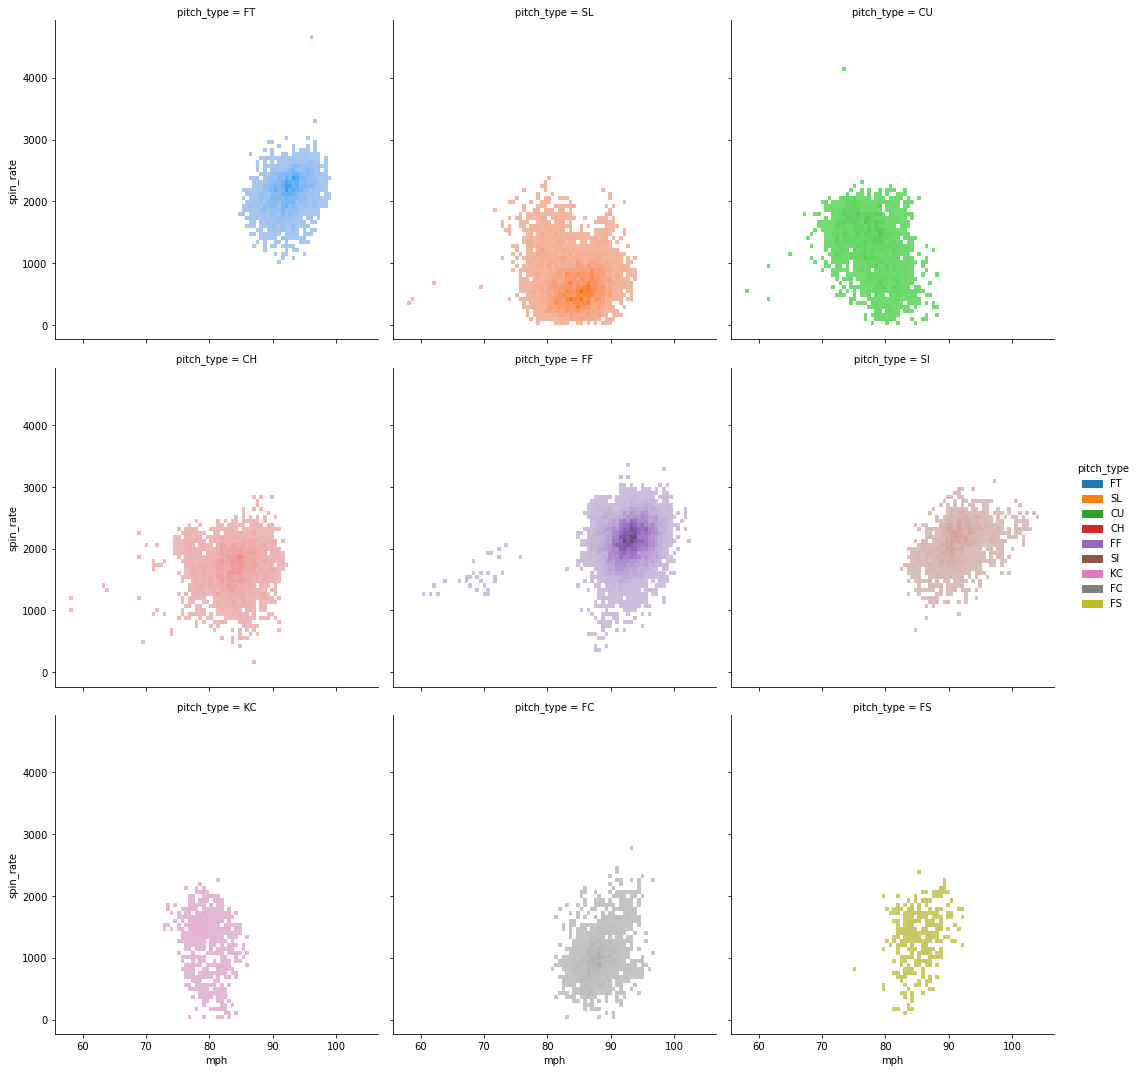

In [23]:
# (0.11) version of seaborn lets you get around this by letting you pass a second variable to ```displot``` instead of calling ```relplot```
g = sns.displot(x='mph', y='spin_rate', col='pitch_type', hue='pitch_type', data=df, col_wrap=3)

It's basically the same thing, but adds some nice shading where you get a lot of overlapping points (like with four-seam fastballs). The other cool thing is you can view it in contour form by passing ```kind='kde'```

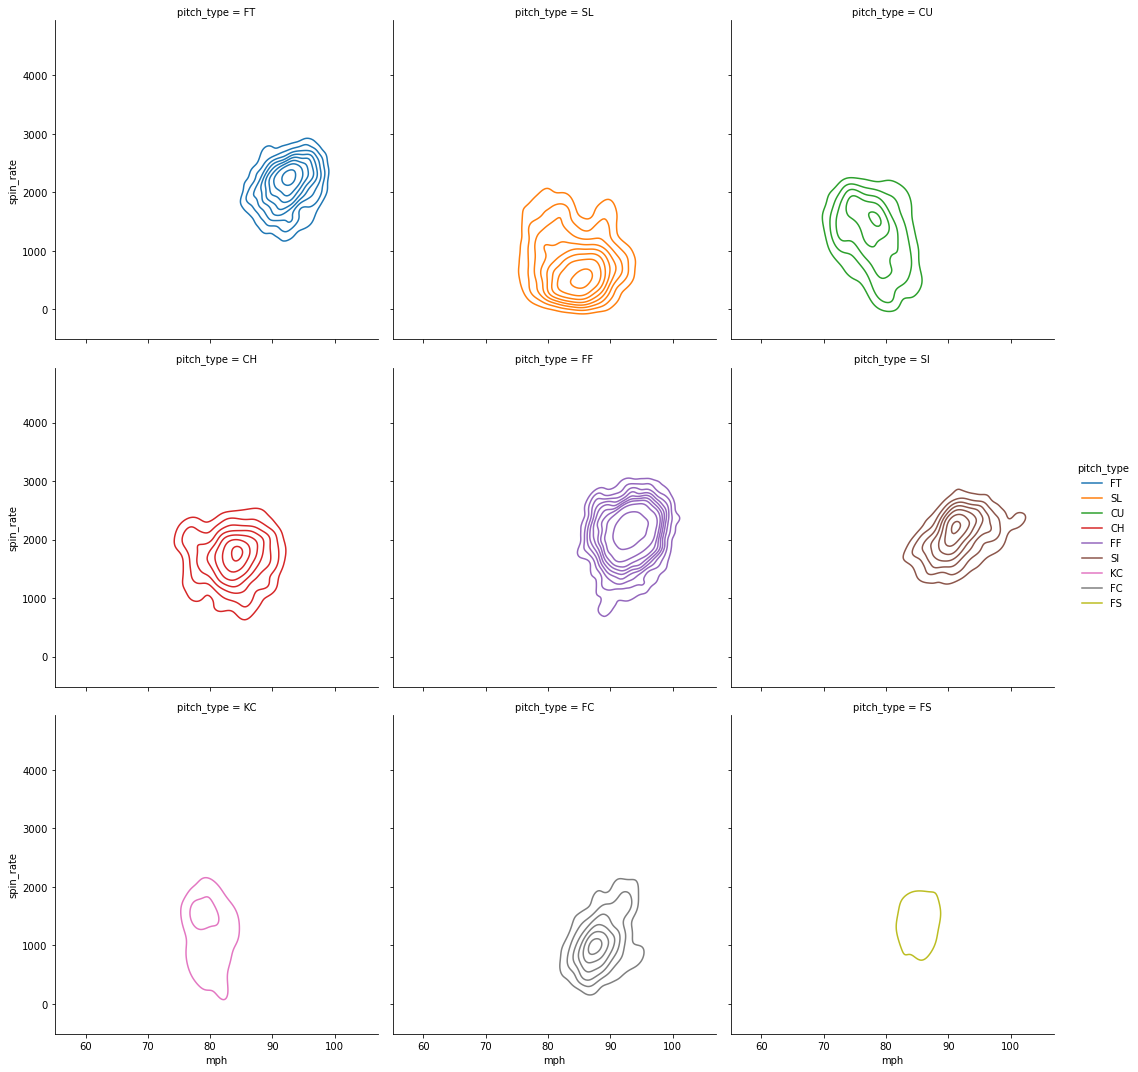

In [24]:
g = sns.displot(x='mph', y='spin_rate', col='pitch_type', hue='pitch_type', kind='kde', data=df, col_wrap=3)

### Figure Above: Pitch sPeed vs Spin by Pitch Type - Contour
Here it's clear that the relationship between spin and speed is negative for change ups (CU) and slightly positive for four seam fastballs (FF)

# Coorelation

In [25]:
df[['spin_rate', 'mph', 'end_speed', 's']].corr()

,spin_rate,mph,end_speed,s
spin_rate,1.000000,0.551015,0.485016,-0.093448
mph,0.551015,1.000000,0.988746,-0.025284
end_speed,0.485016,0.988746,1.000000,-0.011966
s,-0.093448,-0.025284,-0.011966,1.000000


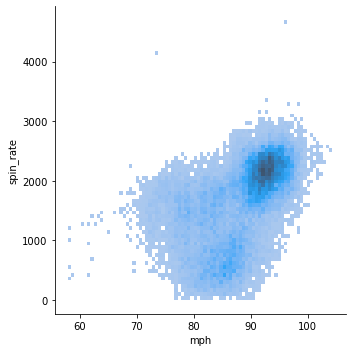

In [28]:
# scatter plot of 0.55 correlation btween mph and spin_rate
g = sns.displot(x='mph', y='spin_rate', data=df)

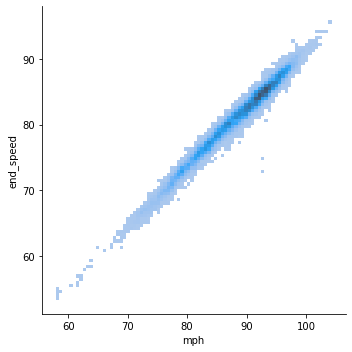

In [29]:
# scatter plot of 0.98 correlation between start vs end pitch_speed
g = sns.displot(x='mph', y='end_speed', data=df)

# Line Plots
When one of the variables is some measure of *time* (e.g. inning 1-9, year 2009-2020) a lineplot is usually more useful.

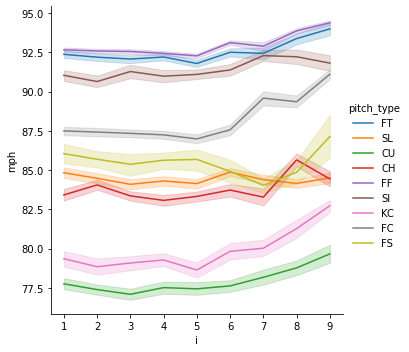

In [30]:
g = sns.relplot(x='i', y='mph', kind='line', hue='pitch_type',
                data=df.query("i <=9"))

In [31]:
# 2nd inning changeups
df.loc[(df['pitch_type'] == 'CU') & (df['i'] == 2),
       ['pitcher', 'batter', 'i', 'pitch_type', 'mph']].sample(5)

,pitcher,batter,i,pitch_type,mph
24402,D.Bundy,A.Mondesi,2,CU,75.6
13439,C.Hamels,Y.Sanchez,2,CU,80.9
24706,M.Estrada,J.Riddle,2,CU,76.0
1286,L.Weaver,A.Avila,2,CU,82.1
5416,J.Berrios,K.Calhoun,2,CU,83.3


Instead of plotting separate lines for each player, seaborn automatically calculates the mean (the line) and 95% confidence intervals (the shaded part), and plots that. If we pass seaborn dat with just one observation for any week and position - say the maximum speed by pitch type each inning, it'll plot just the lines.

In [32]:
max_speed_by_pitch_type_i = (df.query("i <=9").groupby(['pitch_type', 'i'], as_index = False)['mph'].max())

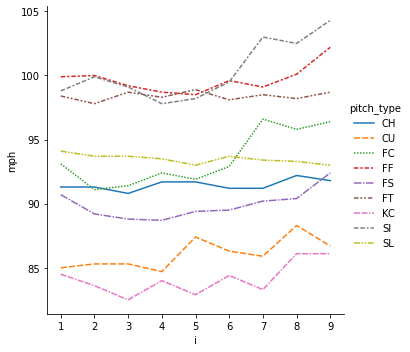

In [34]:
# style controls how the lines look (dotted, dashed, solid, etc)
g = sns.relplot(x='i', y='mph', kind='line', hue='pitch_type', style='pitch_type', data=max_speed_by_pitch_type_i)

In [47]:
# speed by player and week
top20_pitchers = df['pitcher'].value_counts().head(20).reset_index()
top20_pitchers.columns = ['pitcher', 'n']
top20_pitchers

,pitcher,n
0,D.Bundy,447
1,J.Shields,410
2,D.Mengden,380
3,M.Estrada,376
4,M.Perez,372
5,R.Lopez,320
6,J.deGrom,308
7,L.Giolito,295
8,T.Skaggs,295
9,T.Roark,290


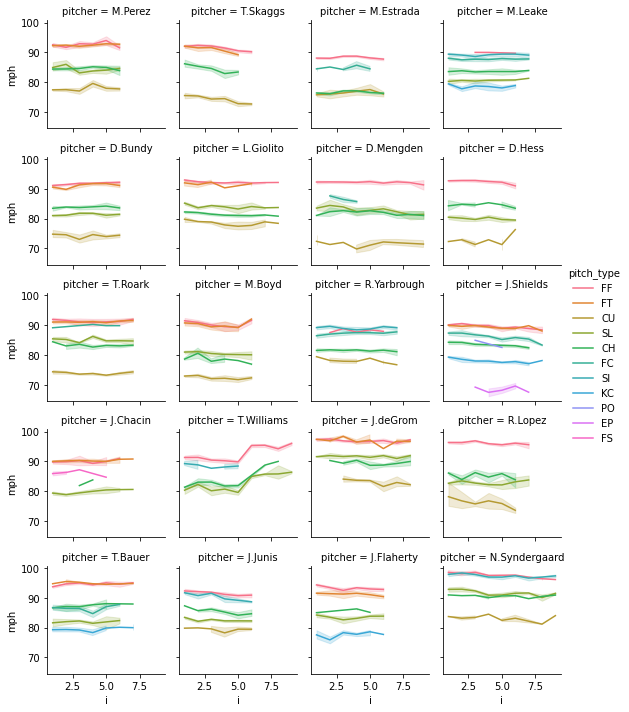

In [48]:
g = sns.relplot(x='i', y='mph', kind='line', hue='pitch_type', col='pitcher',
                col_wrap=4, height=2, data=pd.merge(df.query("i <=9"),
                                                    top20_pitchers))

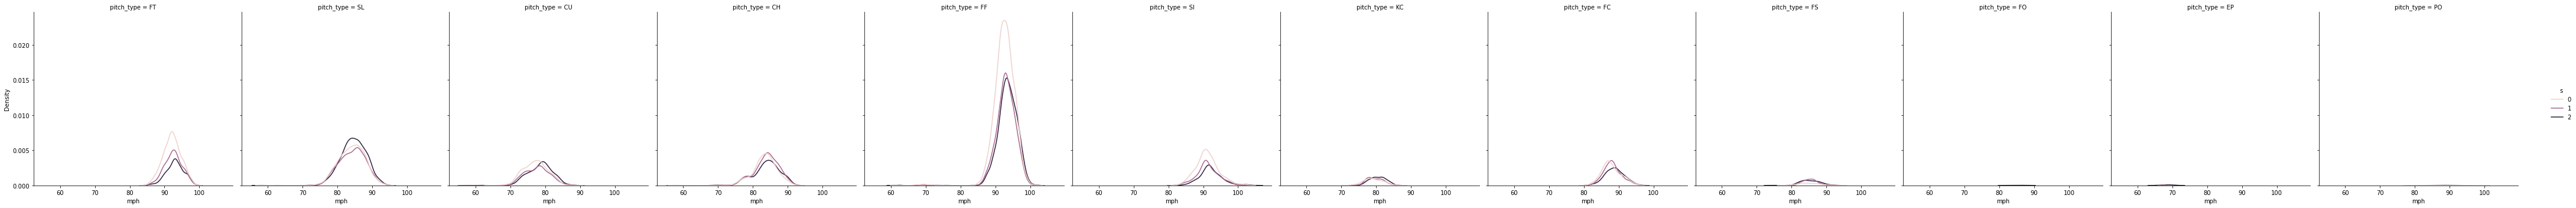

In [49]:
##############
# plot options
##############

# basic plot
g = sns.displot(df, kind='kde', x='mph', hue='s', col='pitch_type')

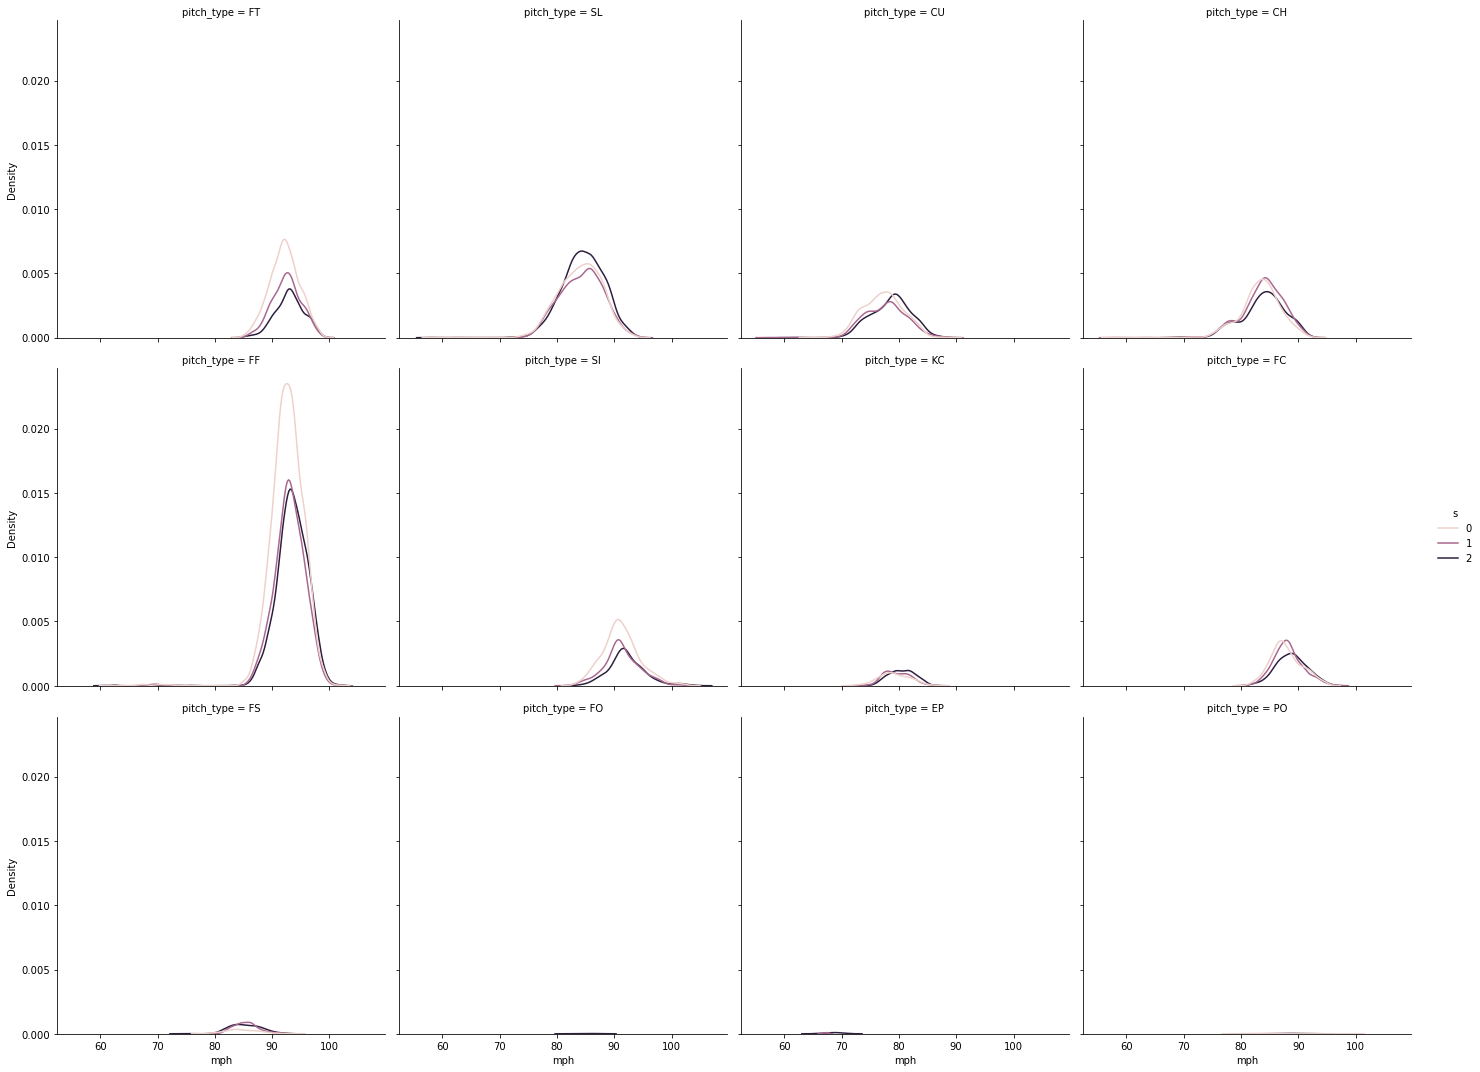

In [51]:
# wrapping columns
g = sns.displot(df, kind='kde', x='mph', hue='s', col='pitch_type', col_wrap=4)

# Adding a Title
Adding a title is a two step process. First you have to make room, then you have to add the title itslef.
The method is ```suptitle``` (for super title) because title is reserved for indivual plots

In [52]:
# adding a title
g.fig.subplots_adjust(top=0.9) # adding a title
g.fig.suptitle('Distribution of Pitch Speeds by Type, Strikes')

Text(0.5, 0.98, 'Distribution of Pitch Speeds by Type, Strikes')

This is something that seems like it should be easier, but it's a small price to pay for the overall flexibility of this approach. I'd recommend just memorizing it and moving on.

In [53]:
g.set(xlim=(65, 105))

In [54]:
# changing labels
g.set_xlabels('MPH')
g.set_ylabels('Density')

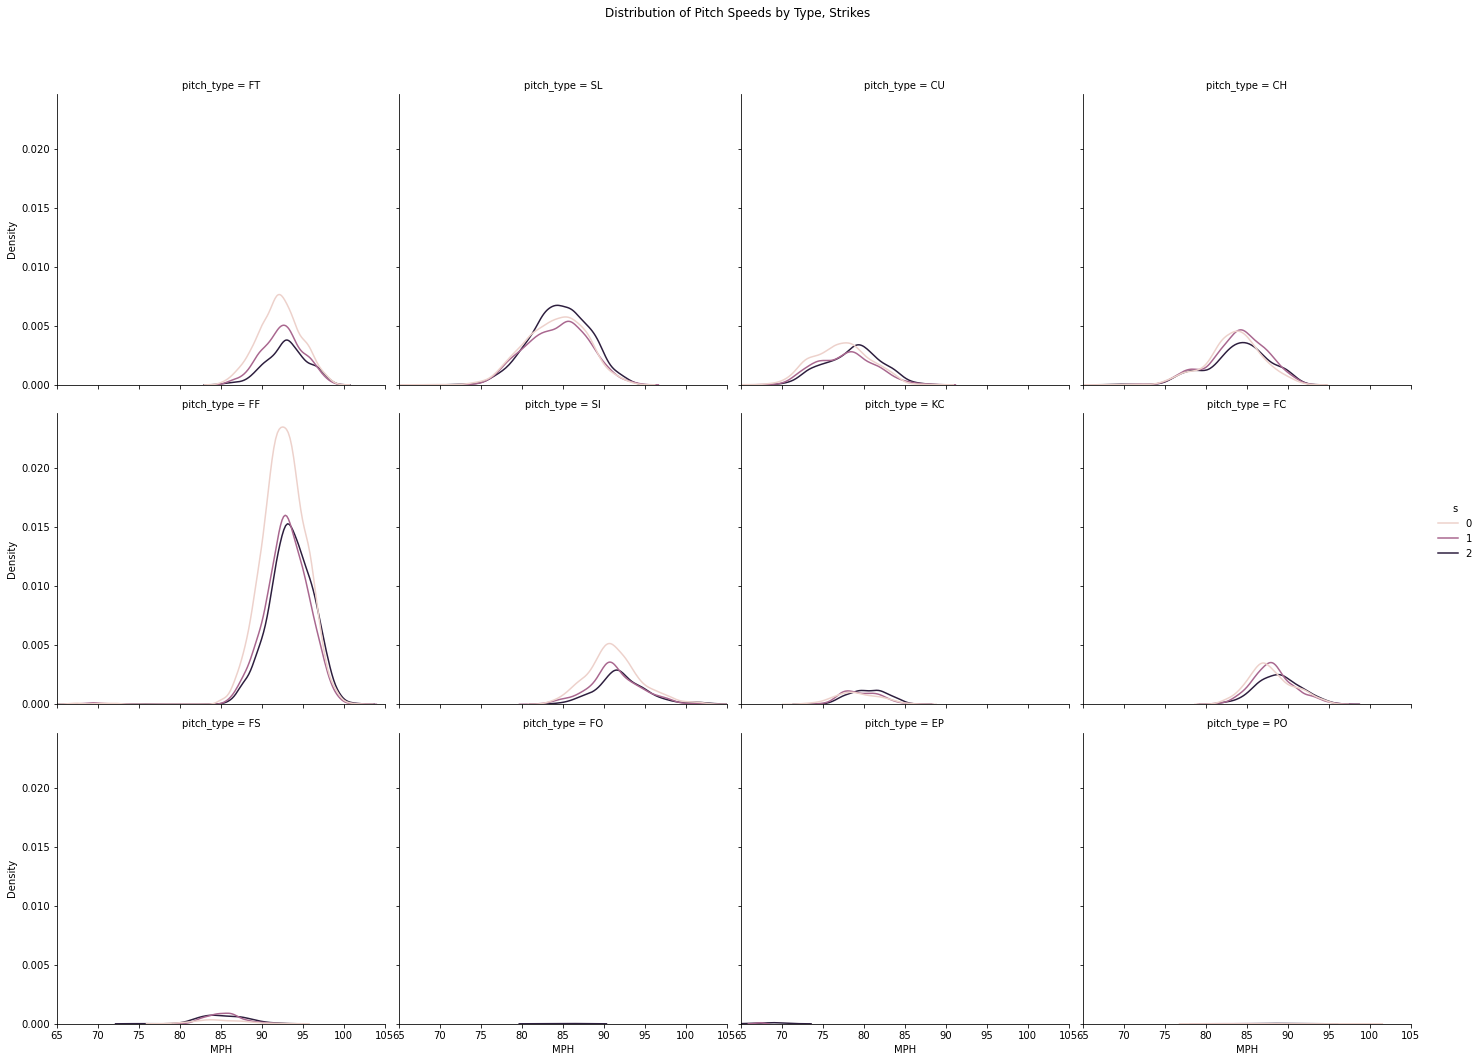

In [57]:
g.figure

In [58]:
#g.savefig('speed_by_type_strike.png')